# Impact of Financial Metrics on Stock Price Variations: A Data-Driven Approach to Forecasting
## Author: Ranil Rai

## Introduction

In this project, we delve into the dynamic relationship between key financial metrics and stock price changes across major technology companies like Apple, Google, and Microsoft. Utilizing a robust dataset sourced from Alpha Vantage and processed through meticulous data acquisition and preparation phases, this study employs statistical and machine learning models to uncover potential predictors of stock price movements. The project is structured to follow a comprehensive workflow that includes:

- **Data Acquisition**: Systematic collection of daily stock and quarterly financial data using API calls.
- **Data Preparation**: Detailed data cleaning and preparation, ensuring accuracy for analysis.
- **Exploratory Data Analysis (EDA)**: In-depth analysis using visualizations to understand trends and patterns.
- **Statistical Analysis**: Correlation studies to explore relationships between financial metrics and stock price changes.
- **Predictive Modeling**: Application of Decision Tree Regression and OLS regression models to forecast stock price changes.

By integrating these components, the project aims to provide insights that can aid investors and financial analysts in making informed decisions.


### Importing necessary libraries 

In [2]:
import requests
import pandas as pd
import numpy as np
from datetime import timedelta
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import os 


## Data Acquisition

This section of the code is dedicated to downloading daily stock data for selected technology companies. We use the Alpha Vantage API to fetch the data. The following steps are performed:

1. **Define Company Symbols**: We specify a list of company symbols for which we want to download stock data, including Apple (AAPL), Microsoft (MSFT), Google (GOOGL), Amazon (AMZN), Meta (META), Tesla (TSLA), and Nvidia (NVDA).

2. **API Request**: For each company symbol, we make a request to the Alpha Vantage API. The parameters for the request include the function (TIME_SERIES_DAILY), symbol, output size (full), data type (CSV), and an API key.

3. **Save Data to CSV**: The response from the API, which is the daily stock data in CSV format, is saved to a file named after the company symbol (e.g., 'AAPL_daily_stock_data.csv').

4. **Confirmation Message**: After successfully downloading and saving the data for each company, a confirmation message is printed.

This approach ensures we have the complete historical daily stock data for each company, which will be crucial for our subsequent analysis.


### Obtaining an API Key

To successfully run this script, you need an API key from Alpha Vantage. Here's how to obtain one:

1. Visit the [Alpha Vantage website](https://www.alphavantage.co/).
2. Click on the **Get Your Free API Key Today** button.
3. Follow the prompts to register and receive your API key.

Once you have your API key, set it as an environment variable named `ALPHA_VANTAGE_KEY` on your operating system to use it in this script securely. This helps keep your key private and out of the source code.


In [3]:
# List of company symbols
companies = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA']

# Retrieve API key from environment variable
api_key = os.getenv('ALPHA_VANTAGE_KEY')

for symbol in companies:
    params = {
        'function': 'TIME_SERIES_DAILY',
        'symbol': symbol,
        'outputsize': 'full',
        'datatype': 'csv',
        'apikey': api_key  # Use the API key from the environment variable
    }

    # Make the request
    response = requests.get('https://www.alphavantage.co/query', params=params)

    # Save the data to a CSV file
    filename = f'{symbol}_daily_stock_data.csv'
    with open(filename, 'wb') as file:
        file.write(response.content)

    print(f'Data for {symbol} downloaded successfully!')


Data for AAPL downloaded successfully!
Data for MSFT downloaded successfully!
Data for GOOGL downloaded successfully!
Data for AMZN downloaded successfully!
Data for META downloaded successfully!
Data for TSLA downloaded successfully!
Data for NVDA downloaded successfully!


## Loading Financial Data

This section of the code is responsible for loading the financial data of technology companies from a CSV file named `financial_data.csv`. The steps involved are as follows:

1. **Reading the Data**: We use the `pandas` library to read the financial data from the specified CSV file. This data includes various financial metrics such as Revenue, Gross Profit, Operating Income, and Net Income, among others, which are crucial for our analysis.

2. **Initial Data Display**: After loading the data, the first few rows are displayed using `financial_data.head()`. This helps in getting a quick overview of the data structure and the types of financial metrics available for each company.

3. **Data Information**: We also display the data type of each column using `financial_data.info()`. This provides insights into the total number of entries, the type of data in each column, and any potential issues with null values, ensuring that the data is clean and ready for further analysis.

This data will be used to correlate the financial metrics with stock price movements to understand the impact of quarterly financial reports on stock valuation.


In [2]:
import pandas as pd

# URL to the raw CSV file on GitHub
financial_data_url = 'https://raw.githubusercontent.com/ranil-rai/IS-362-001/main/financial_data.csv'

# Load the data directly from the GitHub repository
financial_data = pd.read_csv(financial_data_url)

# Display the first few rows of the data
financial_data.head()


,stock,Quarter,Revenue,Gross Profit,Operating Income,Pre-Tax Income,Income After Taxes,Net Income,EBITDA,EBIT,...,Shareholder Equity,Net Cash Flow,Current Ratio,Gross Margin,Net Profit Margin,EBITA Margin,ROE - Return On Equity,ROA - Return On Assets,ROI - Return On Investment,Free Cash Flow Per Share
0,AAPL,12/31/2023,119575,54855,40373,40323,33916,33916,43221,40373,...,74100,11237,1.0725,45.8750,28.3638,33.7637,45.7706,9.5940,20.0463,2.4076
1,AAPL,9/30/2023,89498,40427,26969,26998,22956,22956,29622,26969,...,62146,839,0.9880,45.1708,25.6497,30.1336,36.9388,6.5108,14.5820,1.2170
2,AAPL,6/30/2023,81797,36413,22998,22733,19881,19881,26050,22998,...,60274,2769,0.9816,44.5163,24.3053,28.1160,32.9844,5.9340,12.5555,1.5557
3,AAPL,3/31/2023,94836,41976,28318,28382,24160,24160,31216,28318,...,62158,5155,0.9404,44.2617,25.4756,29.8600,38.8687,7.2736,15.1760,1.6312
4,AAPL,12/31/2022,117154,50332,36016,35623,29998,29998,38932,36016,...,56727,-3003,0.9380,42.9623,25.6056,30.7424,52.8813,8.6513,19.1860,1.8939


In [3]:
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   stock                       140 non-null    object 
 1   Quarter                     140 non-null    object 
 2   Revenue                     140 non-null    int64  
 3   Gross Profit                140 non-null    int64  
 4   Operating Income            140 non-null    int64  
 5   Pre-Tax Income              140 non-null    int64  
 6   Income After Taxes          140 non-null    int64  
 7   Net Income                  140 non-null    int64  
 8   EBITDA                      140 non-null    int64  
 9   EBIT                        140 non-null    int64  
 10  Shares Outstanding          140 non-null    int64  
 11  Earnings Per Share(EPS)     140 non-null    float64
 12  Total Assets                140 non-null    int64  
 13  Total Liabilities           140 non

## Data Preparation and Stock Price Association

### Date Conversion
- **Quarterly Dates**: The 'Quarter' column in the financial data is converted to `datetime` format. This allows for more accurate comparisons and operations involving dates.



In [4]:
financial_data['Quarter'] = pd.to_datetime(financial_data['Quarter'])

### Stock Price Retrieval
- **Function Definition**: A function `find_nearest_prices` is defined to find the closest stock prices before and after each quarterly report date. This function:
  1. Converts the 'timestamp' in the stock data to `datetime`.
  2. Sorts the stock data by 'timestamp'.
  3. Finds the closest stock closing price before and after the report date.

- **Applying the Function**: For each entry in the financial data, this function is applied to retrieve the nearest stock prices before and after the quarterly report. The prices are stored in new columns `Closing Price Before Release` and `Closing Price After Release`.



In [5]:
def find_nearest_prices(stock_data, report_date):
    # Ensure the stock data 'timestamp' is in datetime format
    stock_data['timestamp'] = pd.to_datetime(stock_data['timestamp'])
    
    # Sort stock data to ensure it is in the right order for searching
    stock_data = stock_data.sort_values(by='timestamp')
    
    # Find the last available trading date before the report date and the first available date after
    before = stock_data[stock_data['timestamp'] < report_date].tail(1)  # The closest date before
    after = stock_data[stock_data['timestamp'] > report_date].head(1)   # The closest date after
    
    if not before.empty:
        nearest_before = before['close'].values[0]
    else:
        nearest_before = None
    
    if not after.empty:
        nearest_after = after['close'].values[0]
    else:
        nearest_after = None
    
    return nearest_before, nearest_after


### Data Integration
- **File Mapping**: A dictionary maps company symbols to their respective stock data file paths.
- **Data Reading**: Stock data for each company is read into a dictionary `stock_price_data`, facilitating easy access when applying the `find_nearest_prices` function.




In [22]:
# Adjust these paths to point to your actual stock price data files
stock_files = {
    'AAPL': 'AAPL_daily_stock_data.csv',
    'AMZN': 'AMZN_daily_stock_data.csv',
    'GOOGL': 'GOOGL_daily_stock_data.csv',
    'META': 'META_daily_stock_data.csv',
    'MSFT': 'MSFT_daily_stock_data.csv',
    'NVDA': 'NVDA_daily_stock_data.csv',
    'TSLA': 'TSLA_daily_stock_data.csv'
}

stock_price_data = {stock: pd.read_csv(path) for stock, path in stock_files.items()}

In [23]:
# Initialize new columns for closing prices
financial_data['Closing Price Before Release'] = None
financial_data['Closing Price After Release'] = None

for index, row in financial_data.iterrows():
    stock = row['stock']
    quarter_date = row['Quarter']
    
    if stock in stock_price_data:
        before_price, after_price = find_nearest_prices(stock_price_data[stock], quarter_date)
        financial_data.at[index, 'Closing Price Before Release'] = before_price
        financial_data.at[index, 'Closing Price After Release'] = after_price

### Final Output
- **Display**: The first few rows of the updated financial data are displayed, showing the integration of stock prices with financial metrics.
- **Data Saving**: The complete dataset, now including the stock prices around each report date, is saved to a CSV file. This ensures that all modifications are preserved and can be easily shared or further analyzed.

### Data Structure Overview
- **Dataframe Information**: After all transformations and additions, the structure and type of each column in the dataset are displayed, confirming the successful data integration and preparation for analysis.

In [24]:
financial_data.head()


,stock,Quarter,Revenue,Gross Profit,Operating Income,Pre-Tax Income,Income After Taxes,Net Income,EBITDA,EBIT,...,Current Ratio,Gross Margin,Net Profit Margin,EBITA Margin,ROE - Return On Equity,ROA - Return On Assets,ROI - Return On Investment,Free Cash Flow Per Share,Closing Price Before Release,Closing Price After Release
0,AAPL,2023-12-31,119575,54855,40373,40323,33916,33916,43221,40373,...,1.0725,45.8750,28.3638,33.7637,45.7706,9.5940,20.0463,2.4076,192.53,185.64
1,AAPL,2023-09-30,89498,40427,26969,26998,22956,22956,29622,26969,...,0.9880,45.1708,25.6497,30.1336,36.9388,6.5108,14.5820,1.2170,171.21,173.75
2,AAPL,2023-06-30,81797,36413,22998,22733,19881,19881,26050,22998,...,0.9816,44.5163,24.3053,28.1160,32.9844,5.9340,12.5555,1.5557,189.59,192.46
3,AAPL,2023-03-31,94836,41976,28318,28382,24160,24160,31216,28318,...,0.9404,44.2617,25.4756,29.8600,38.8687,7.2736,15.1760,1.6312,162.36,166.17
4,AAPL,2022-12-31,117154,50332,36016,35623,29998,29998,38932,36016,...,0.9380,42.9623,25.6056,30.7424,52.8813,8.6513,19.1860,1.8939,129.93,125.07


In [47]:
output_file_path = 'updated_financial_data.csv'

# Save the DataFrame to a CSV file
financial_data.to_csv(output_file_path, index=False)

In [48]:
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   stock                         140 non-null    object        
 1   Quarter                       140 non-null    datetime64[ns]
 2   Revenue                       140 non-null    int32         
 3   Gross Profit                  140 non-null    int32         
 4   Operating Income              140 non-null    int32         
 5   Pre-Tax Income                140 non-null    int32         
 6   Income After Taxes            140 non-null    int32         
 7   Net Income                    140 non-null    int32         
 8   EBITDA                        140 non-null    int32         
 9   EBIT                          140 non-null    int32         
 10  Shares Outstanding            140 non-null    int16         
 11  Earnings Per Share(EPS)       14

## Data Cleaning and Transformation

### Checking for Missing Values
- **Missing Values Check**: We begin by checking for missing values across all columns in the dataset. This step ensures that the data is complete and reliable for analysis.

### Date Conversion
- **Quarterly Dates Reformatting**: The 'Quarter' column is re-converted to `datetime` format to guarantee uniformity after any previous manipulations.

### Price Change Calculation
- **Percentage Change in Stock Prices**: We calculate the percentage change in stock prices following the earnings release. This is done by comparing the stock price immediately before and after the earnings report date. The formula used is:
  \[
  \text{Price Change (\%)} = \left(\frac{\text{Closing Price After Release} - \text{Closing Price Before Release}}{\text{Closing Price Before Release}}\right) \times 100
  \]

### Data Overview
- **Clean Data Display**: After the transformations, the first few rows of the cleaned data are displayed, providing a snapshot of the dataset with the new `Price Change (%)` column.
- **Missing Values Summary**: A summary of any remaining missing values is displayed, highlighting columns with missing data, if any. In this case, there were no missing values.

### Additional Calculations
- **Quarterly Returns**: Although similar to the percentage change in stock prices, quarterly returns are calculated and stored separately to facilitate specific analyses related to investment returns over the quarterly period.

### Verification and Output
- **Data Display with Returns**: To verify the accuracy of our calculations, the dataset with newly calculated `Quarterly Returns` is displayed, showcasing a few key columns including stock, quarter dates, and the before and after prices along with the calculated returns.

This thorough data cleaning and transformation process ensures that the dataset is ready for detailed analysis, providing clear insights into the impact of quarterly financial reports on stock prices.


In [49]:
# Converting columns to their appropriate data types
financial_data['Quarter'] = pd.to_datetime(financial_data['Quarter'])  # Ensuring 'Quarter' is datetime format

# Converting integer columns, if not already
integer_columns = ['Revenue', 'Gross Profit', 'Operating Income', 'Pre-Tax Income', 'Income After Taxes',
                   'Net Income', 'EBITDA', 'EBIT', 'Shares Outstanding', 'Total Assets', 'Total Liabilities', 
                   'Shareholder Equity', 'Net Cash Flow']
financial_data[integer_columns] = financial_data[integer_columns].apply(pd.to_numeric, downcast='integer', errors='coerce')

# Converting float columns, if not already
float_columns = ['Earnings Per Share(EPS)', 'Current Ratio', 'Gross Margin', 'Net Profit Margin', 'EBITA Margin',
                 'ROE - Return On Equity', 'ROA - Return On Assets', 'ROI - Return On Investment', 
                 'Free Cash Flow Per Share']
financial_data[float_columns] = financial_data[float_columns].apply(pd.to_numeric, downcast='float', errors='coerce')

# Ensuring closing prices are treated as numeric, assuming they are stored as strings
financial_data['Closing Price Before Release'] = pd.to_numeric(financial_data['Closing Price Before Release'], errors='coerce')
financial_data['Closing Price After Release'] = pd.to_numeric(financial_data['Closing Price After Release'], errors='coerce')

# Rechecking the data types to ensure changes are applied
financial_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   stock                         140 non-null    object        
 1   Quarter                       140 non-null    datetime64[ns]
 2   Revenue                       140 non-null    int32         
 3   Gross Profit                  140 non-null    int32         
 4   Operating Income              140 non-null    int32         
 5   Pre-Tax Income                140 non-null    int32         
 6   Income After Taxes            140 non-null    int32         
 7   Net Income                    140 non-null    int32         
 8   EBITDA                        140 non-null    int32         
 9   EBIT                          140 non-null    int32         
 10  Shares Outstanding            140 non-null    int16         
 11  Earnings Per Share(EPS)       14

In [50]:
# Data Cleaning and Transformation Steps

# Check for missing values
missing_values = financial_data.isnull().sum()

# Convert 'Quarter' to datetime format
financial_data['Quarter'] = pd.to_datetime(financial_data['Quarter'])

# Calculate percentage change in stock prices after the earnings release
financial_data['Price Change (%)'] = ((financial_data['Closing Price After Release'] - financial_data['Closing Price Before Release']) / financial_data['Closing Price Before Release']) * 100

# Display the cleaned data and missing values information
cleaned_data_head = financial_data.head()
missing_values_summary = missing_values[missing_values > 0]  # Show only columns with missing values if any

cleaned_data_head


,stock,Quarter,Revenue,Gross Profit,Operating Income,Pre-Tax Income,Income After Taxes,Net Income,EBITDA,EBIT,...,EBITA Margin,ROE - Return On Equity,ROA - Return On Assets,ROI - Return On Investment,Free Cash Flow Per Share,Closing Price Before Release,Closing Price After Release,Price Change (%),Quarterly Returns,Quarter_label
0,AAPL,2023-12-31,119575,54855,40373,40323,33916,33916,43221,40373,...,33.763699,45.770599,9.5940,20.046301,2.4076,192.53,185.64,-3.578663,-0.035787,2023Q4
1,AAPL,2023-09-30,89498,40427,26969,26998,22956,22956,29622,26969,...,30.133600,36.938801,6.5108,14.582000,1.2170,171.21,173.75,1.483558,0.014836,2023Q3
2,AAPL,2023-06-30,81797,36413,22998,22733,19881,19881,26050,22998,...,28.115999,32.984402,5.9340,12.555500,1.5557,189.59,192.46,1.513793,0.015138,2023Q2
3,AAPL,2023-03-31,94836,41976,28318,28382,24160,24160,31216,28318,...,29.860001,38.868698,7.2736,15.176000,1.6312,162.36,166.17,2.346637,0.023466,2023Q1
4,AAPL,2022-12-31,117154,50332,36016,35623,29998,29998,38932,36016,...,30.742399,52.881302,8.6513,19.186001,1.8939,129.93,125.07,-3.740476,-0.037405,2022Q4


In [51]:
missing_values_summary

Series([], dtype: int64)

In [52]:
# Calculate the quarterly returns
financial_data['Quarterly Returns'] = (financial_data['Closing Price After Release'] - financial_data['Closing Price Before Release']) / financial_data['Closing Price Before Release']

# Display the new column to verify calculations
financial_data[['stock', 'Quarter', 'Closing Price Before Release', 'Closing Price After Release', 'Quarterly Returns']].head()


,stock,Quarter,Closing Price Before Release,Closing Price After Release,Quarterly Returns
0,AAPL,2023-12-31,192.53,185.64,-0.035787
1,AAPL,2023-09-30,171.21,173.75,0.014836
2,AAPL,2023-06-30,189.59,192.46,0.015138
3,AAPL,2023-03-31,162.36,166.17,0.023466
4,AAPL,2022-12-31,129.93,125.07,-0.037405


## Exploratory Data Analysis
### Visualizing Quarterly Returns

To better understand the distribution of quarterly returns across all companies and quarters analyzed, we create a histogram overlaid with a kernel density estimate (KDE) to visualize the data. This visualization helps in identifying the spread and skewness of returns following quarterly reports.


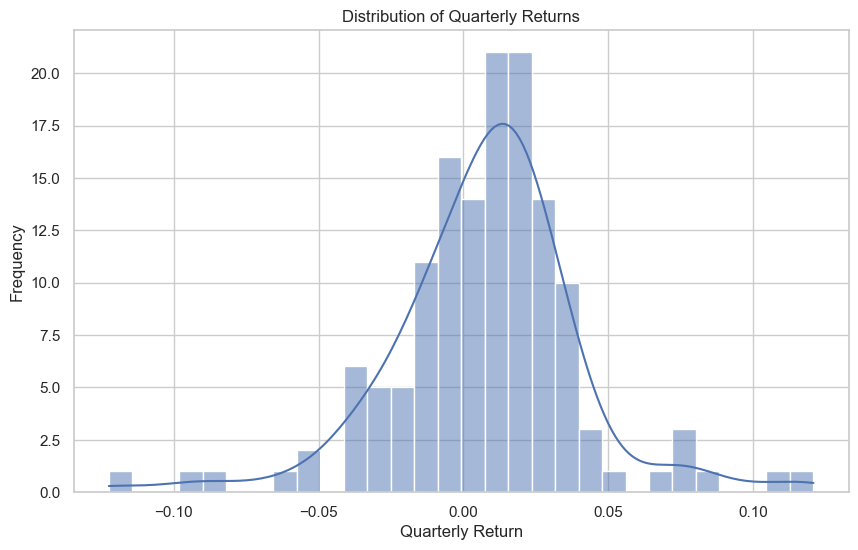

In [53]:
# Plotting the quarterly returns
plt.figure(figsize=(10, 6))
sns.histplot(financial_data['Quarterly Returns'], bins=30, kde=True)
plt.title('Distribution of Quarterly Returns')
plt.xlabel('Quarterly Return')
plt.ylabel('Frequency')
plt.show()


### Analysis of the Histogram

The histogram above displays the distribution of quarterly returns. The distribution appears roughly bell-shaped, suggesting a normal distribution with some outliers on both the negative and positive sides. This visualization indicates the typical variance in stock price reactions to quarterly earnings reports and can guide further detailed statistical analysis.


### Visualizing Quarterly Returns by Stock

To provide a more detailed insight into how quarterly returns vary across different technology stocks, we create separate histograms for each stock. These visualizations help us to understand the unique performance characteristics and variability of returns for companies like Apple (AAPL), Google (GOOGL), Microsoft (MSFT), Amazon (AMZN), Meta (META), Tesla (TSLA), and Nvidia (NVDA). Each histogram is equipped with a kernel density estimate (KDE) to smooth the distribution, allowing for easier identification of trends and outliers.


<Figure size 1800x1200 with 0 Axes>

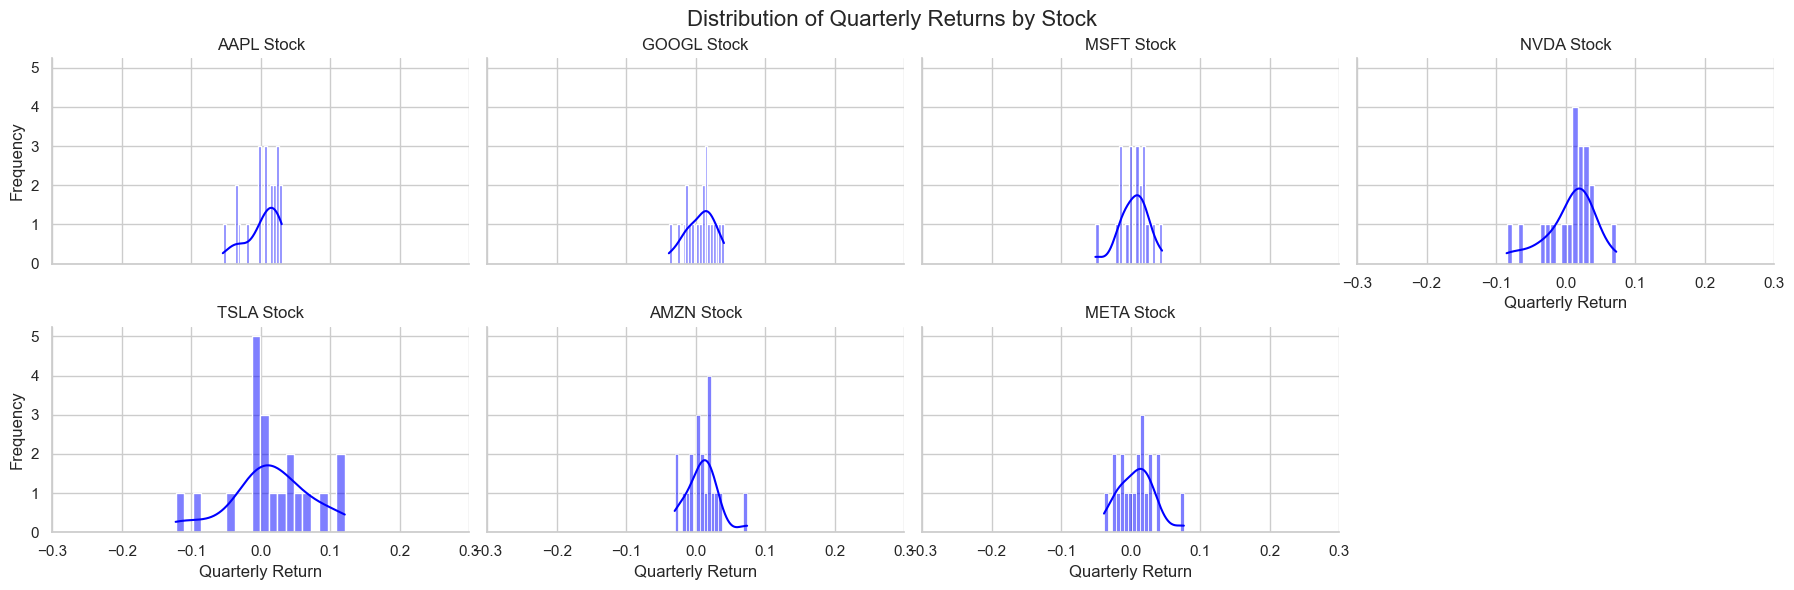

In [54]:
# Improve the visualization of histograms by ensuring all subplots have clear labels and titles
plt.figure(figsize=(18, 12))
g = sns.FacetGrid(financial_data, col="stock", col_wrap=4, height=3, aspect=1.5)
g.map(sns.histplot, "Quarterly Returns", bins=20, kde=True, color="blue")
g.set_titles("{col_name} Stock")
g.set_axis_labels("Quarterly Return", "Frequency")
g.set(xlim=(- 0.3,0.3))  # Standardize x-axis limits for better comparison

# Adjust top margin to avoid overlap with suptitle
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Quarterly Returns by Stock', fontsize=16)
plt.show()


## Comparative Analysis of Quarterly Returns

The histograms displayed above provide a comparative view of the quarterly returns for different stocks within the technology sector. Each subplot focuses on a specific company, showing the frequency of quarterly returns within a standardized range from -0.3 to 0.3. This visualization format allows for easy comparison between companies:

- **Volatility**: Some stocks show more spread in their returns (e.g., Tesla and Nvidia), indicating higher volatility.
- **Skewness**: Depending on the stock, the distribution can be skewed towards positive or negative returns, suggesting different market reactions to quarterly financial reports.
- **Peak Analysis**: The peaks of these distributions help identify the most common return intervals for each stock.

This detailed breakdown assists in understanding the distinct financial dynamics of each company and informs better investment strategies based on historical performance.


### Correlation Among Financial Metrics

The heatmap above illustrates the correlation among various key financial metrics including Quarterly Returns, Revenue, Net Income, and EBITDA. This visualization helps in understanding how closely these metrics are related to each other, identifying potential indicators of financial health that might impact each other.


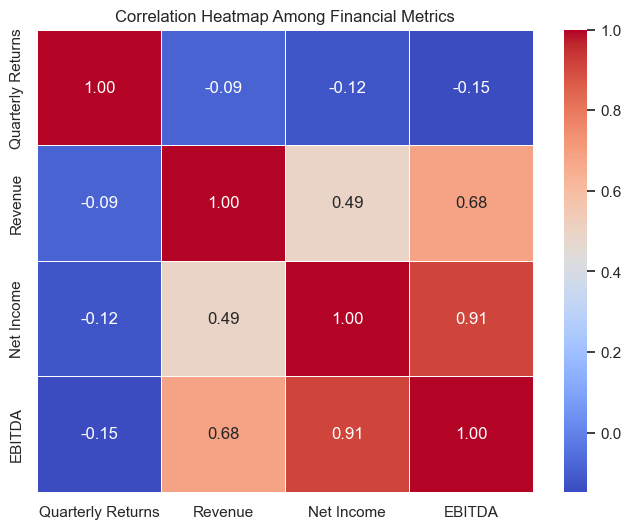

In [55]:
# Select the columns for correlation analysis
columns_to_correlate = ['Quarterly Returns', 'Revenue', 'Net Income', 'EBITDA']

# Calculate the correlation matrix
correlation_matrix = financial_data[columns_to_correlate].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap Among Financial Metrics')
plt.show()



### Correlation Between Financial Metrics and Stock Price Changes

This heatmap extends the previous analysis by including 'Price Change (%)', examining how financial metrics correlate with subsequent stock price movements. This analysis is crucial for identifying leading indicators that might predict stock performance based on quarterly financial outcomes.


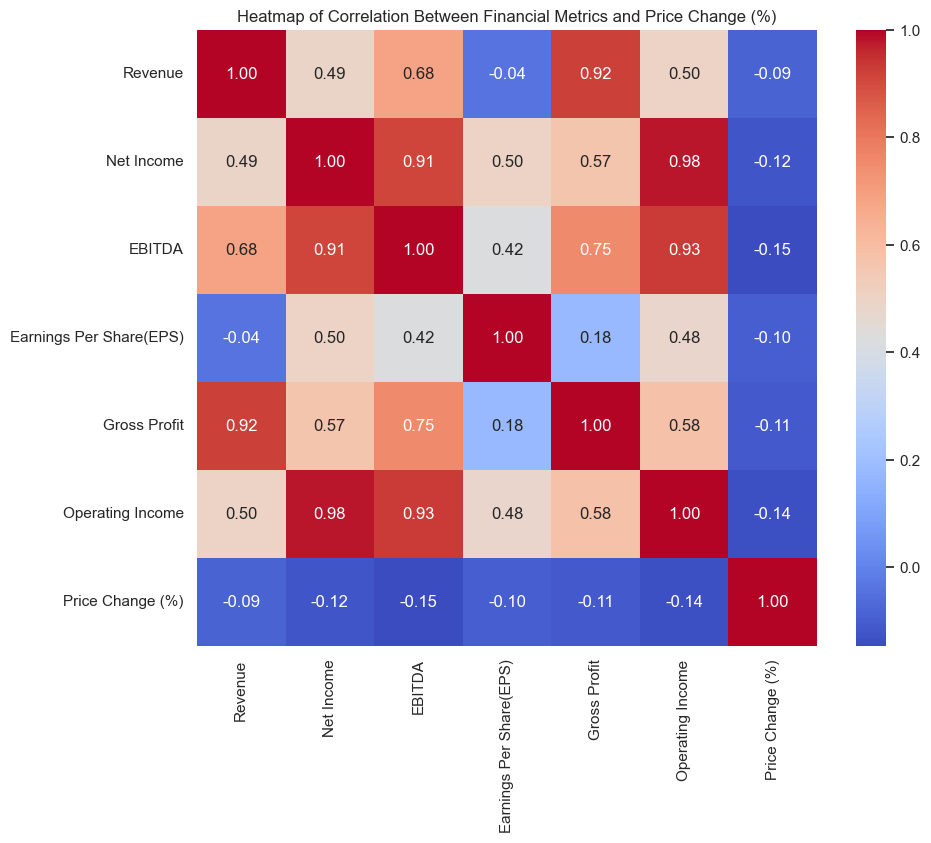

In [56]:
# Calculating the correlation matrix including the 'Price Change (%)'
extended_metrics = ['Revenue', 'Net Income', 'EBITDA', 'Earnings Per Share(EPS)', 'Gross Profit', 'Operating Income', 'Price Change (%)']
correlation_matrix = financial_data[extended_metrics].corr()

# Plotting the heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Between Financial Metrics and Price Change (%)')
plt.show()


## Detailed Insights from Correlation Analysis

The correlation analyses provide a nuanced understanding of the relationships between various financial metrics and their impact on quarterly returns and stock price changes.

### Correlation Among Financial Metrics
The first heatmap illustrates the internal relationships among key financial metrics such as Revenue, Net Income, EBITDA, and Quarterly Returns. Notably, there are strong positive correlations between Revenue, Net Income, and EBITDA, indicating that these metrics tend to move in tandem. However, all these financial metrics show little to no direct correlation with Quarterly Returns, suggesting that other factors may influence stock performance within the quarter.

### Correlation Between Financial Metrics and Price Change (%)
The second heatmap expands the analysis by including 'Price Change (%)', revealing how financial outcomes correlate with subsequent market reactions. While core financial metrics like Net Income and EBITDA show moderate correlations among themselves, their correlation with 'Price Change (%)' is weak. This indicates that immediate market reactions to quarterly reports may not be directly predictable from these financial metrics alone. Interestingly, metrics such as Gross Profit and Operating Income, which are closely related to company operations, also do not strongly predict price changes, highlighting the complex nature of stock market reactions to financial reports.

These heatmaps underscore the complexity of financial markets, where direct relationships between traditional financial metrics and stock price movements can be limited, suggesting the influence of external factors or investor sentiment in driving market behavior following earnings announcements.


## Trend Analysis of Closing Stock Prices Post-Earnings Release

This line graph illustrates the trends in closing stock prices following earnings releases over various quarters for selected technology stocks, including Apple (AAPL), Google (GOOGL), Microsoft (MSFT), Nvidia (NVDA), Tesla (TSLA), Amazon (AMZN), and Meta (META).

### Observations:
- **Significant Growth and Declines**: Certain stocks like NVDA and TSLA show significant upward trends particularly around 2021, followed by sharp declines in 2022. This could indicate market corrections or reactions to external economic factors.
- **Stability in Some Stocks**: Stocks like AAPL and MSFT display more stability over time, suggesting a steadier investor confidence and less volatile market reaction to their earnings releases.
- **Distinct Patterns**: Each stock shows a distinct pattern, reflecting the unique market conditions and company-specific factors affecting their stock prices post-earnings release.




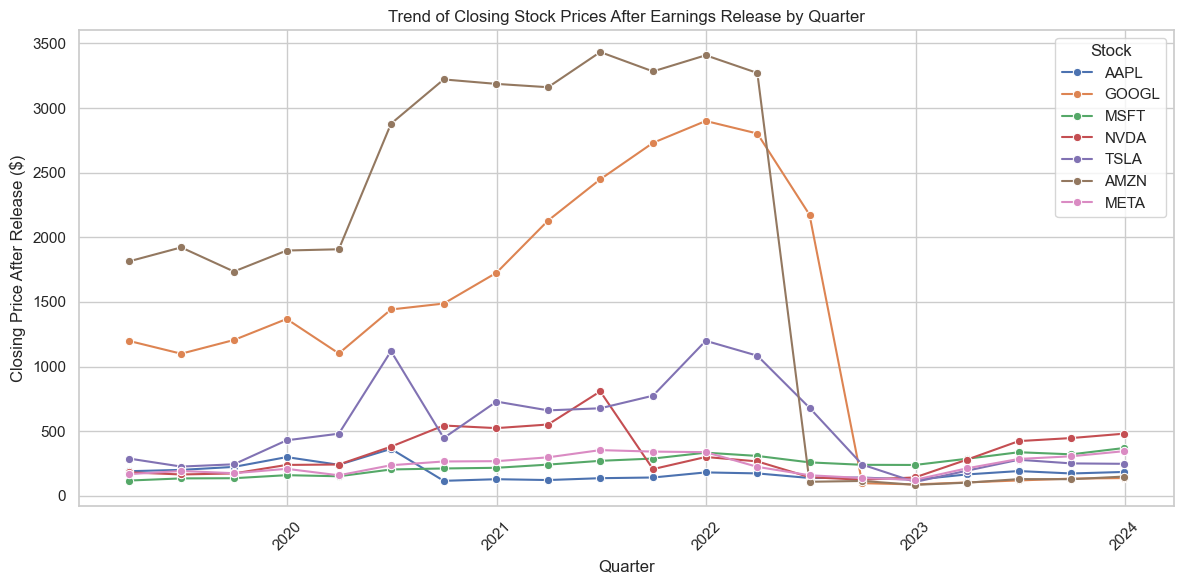

In [57]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Trend Analysis: Plotting stock price changes over quarters
plt.figure(figsize=(12, 6))
sns.lineplot(data=financial_data, x='Quarter', y='Closing Price After Release', hue='stock', marker='o')
plt.title('Trend of Closing Stock Prices After Earnings Release by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Closing Price After Release ($)')
plt.xticks(rotation=45)
plt.legend(title='Stock')
plt.tight_layout()



### Analysis:
- **Sector Impact**: The technology sector shows dynamic changes which could be driven by innovation announcements, regulatory impacts, or global economic conditions that differ significantly across the timeline.
- **Investor Sentiment**: The sharp changes in stock prices post-earnings releases also reflect investor sentiment and their reactions to earnings reports against market expectations.

This analysis not only helps in understanding the individual stock behaviors but also provides insights into the broader market trends within the technology sector over the analyzed period.

## Scatter Plot Analysis: EPS vs. Price Change (%)

This scatter plot provides an insightful look into how changes in stock prices post-earnings releases correlate with the reported Earnings Per Share (EPS) for various major technology companies such as Apple (AAPL), Google (GOOGL), Microsoft (MSFT), Nvidia (NVDA), Tesla (TSLA), Amazon (AMZN), and Meta (META).




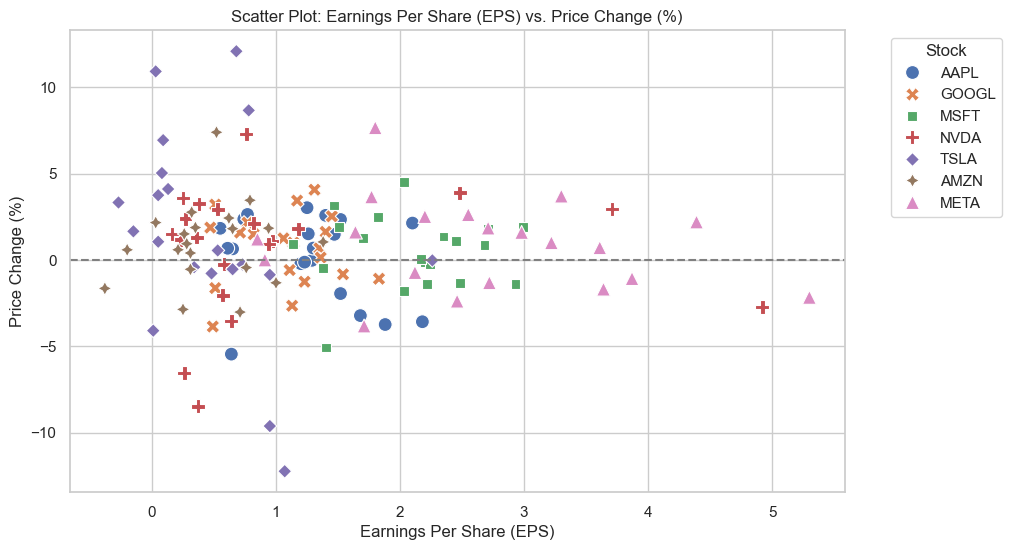

In [35]:
# Adjusting the box plot x-axis to display only the date part of the 'Quarter'
financial_data['Quarter_label'] = financial_data['Quarter'].dt.to_period('Q')  # Convert to quarter format for simplicity

# Scatter Plot for EPS vs. Price Change (%)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=financial_data, x='Earnings Per Share(EPS)', y='Price Change (%)', hue='stock', style='stock', s=100)
plt.title('Scatter Plot: Earnings Per Share (EPS) vs. Price Change (%)')
plt.xlabel('Earnings Per Share (EPS)')
plt.ylabel('Price Change (%)')
plt.axhline(0, color='gray', linestyle='--')  # Adds a horizontal line at zero change
plt.legend(title='Stock', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()


### Observations:
- **Data Distribution**: Each company is represented by unique symbols and colors, allowing us to discern patterns specific to each company. 
- **EPS Influence on Stock Price**: The plot reveals whether higher earnings per share correlate with positive stock price changes post-earnings announcement. For instance, most of the data points seem clustered around lower EPS values with varying price changes.
- **Above and Below Zero**: The horizontal line at zero change is crucial for quickly seeing whether the stock price increased or decreased post-earnings. Points above this line indicate a positive reaction to earnings reports, while points below represent a negative reaction.

### Key Insights:
- **Diverse Reactions**: Different stocks show varied reactions to earnings reports, suggesting that factors beyond EPS, such as market expectations or external economic conditions, might heavily influence stock price movements.
- **Potential Anomalies**: Some companies with higher EPS do not always see a corresponding positive price change, which could prompt further investigation into investor expectations or other financial metrics reported at the time.

This visualization aids in identifying how directly EPS figures drive market reactions across different companies in the tech sector and can be a useful tool for investors analyzing the impact of earnings reports on stock performance.

## Quarterly Stock Price Changes Analysis

### Box Plot Overview

The box plot visualizes the distribution of stock price changes percentage across different quarters from 2019 to 2023. This visualization helps in understanding the volatility and the range of price changes that occurred post-earnings release during each quarter.




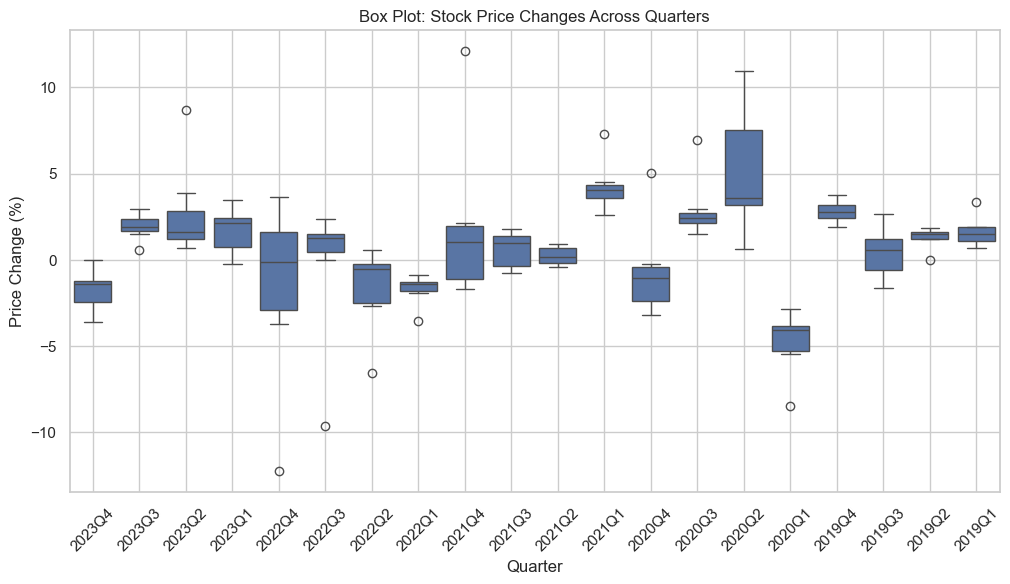

In [59]:
# Box Plot to Compare Stock Price Changes Across Quarters
plt.figure(figsize=(12, 6))
sns.boxplot(data=financial_data, x='Quarter_label', y='Price Change (%)')
plt.title('Box Plot: Stock Price Changes Across Quarters')
plt.xlabel('Quarter')
plt.ylabel('Price Change (%)')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

#### Observations:
- **Volatility Over Time**: Some quarters show greater variability in stock price changes, as indicated by longer whiskers and larger boxes. For instance, early 2020 shows high negative price changes, likely influenced by the market reaction to global events.
- **Outliers**: The presence of outliers, shown as points outside the box and whiskers, indicates quarters where stock price changes were exceptionally high or low compared to typical quarters.
- **Trend and Median**: The median line within each box helps identify whether the typical price change was positive, negative, or neutral, giving a quick insight into overall market sentiment during that quarter.



### Average Price Change Per Quarter

Further analysis is provided by calculating the average stock price change for each quarter, summarized in a table format. This metric provides a clearer view of how stock prices generally moved in each quarter, smoothing out extreme values that can be seen in the box plot.



In [58]:
# Grouping and calculating the average percentage change in stock prices per quarter
average_price_change_per_quarter = financial_data.groupby('Quarter_label')['Price Change (%)'].mean().reset_index()

# Displaying the result
average_price_change_per_quarter


,Quarter_label,Price Change (%)
0,2019Q1,1.628653
1,2019Q2,1.293750
2,2019Q3,0.393506
3,2019Q4,2.789742
4,2020Q1,-4.806549
5,2020Q2,5.226156
6,2020Q3,2.932340
7,2020Q4,-0.701778
8,2021Q1,4.251463
9,2021Q2,0.240314


#### Key Insights:
- **Positive and Negative Trends**: Certain quarters, such as Q2 2020 and Q1 2023, show a significant positive average change, suggesting strong market reactions to favorable conditions or earnings results. Conversely, quarters like Q1 2020 and Q4 2022 exhibit negative average changes, reflecting broader market downturns or unsatisfactory earnings performances.
- **Stability and Fluctuations**: The data shows periods of relative stability (e.g., mid-2021) interspersed with periods of high fluctuations, illustrating how external factors and market dynamics can influence stock prices.

### Conclusion

The combination of box plots and average price change analysis offers a dual perspective on stock market behavior across quarters, revealing both typical outcomes and the range of possible deviations. This analysis is essential for investors and analysts looking to understand market trends and to anticipate potential future movements based on past patterns.

## Exploring the Relationship Between Financial Metrics and Stock Price Changes

This section presents a series of scatter plots with regression lines to explore the relationship between key financial metrics—Revenue, Net Income, and Earnings Per Share (EPS)—and the percentage change in stock prices post-earnings announcement. Each plot aims to visualize potential correlations and provide insights into how these financial figures might influence investor behavior and stock price movements.


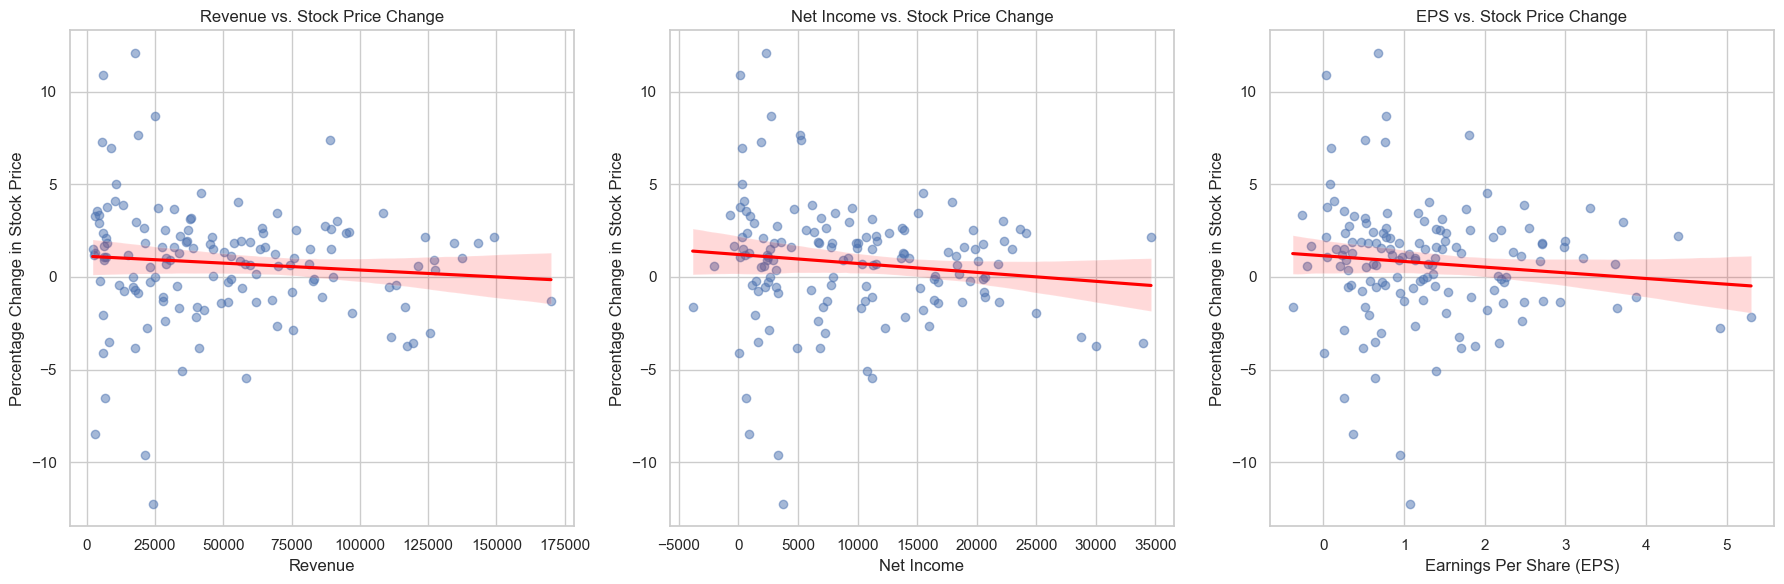

In [61]:
# Create a figure to hold the scatter plots for key financial metrics
plt.figure(figsize=(18, 6))

# Scatter Plot for Revenue vs. Stock Price Change
plt.subplot(1, 3, 1)
sns.regplot(x='Revenue', y='Price Change (%)', data=financial_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Revenue vs. Stock Price Change')
plt.xlabel('Revenue')
plt.ylabel('Percentage Change in Stock Price')

# Scatter Plot for Net Income vs. Stock Price Change
plt.subplot(1, 3, 2)
sns.regplot(x='Net Income', y='Price Change (%)', data=financial_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Net Income vs. Stock Price Change')
plt.xlabel('Net Income')
plt.ylabel('Percentage Change in Stock Price')

# Scatter Plot for EPS vs. Stock Price Change
plt.subplot(1, 3, 3)
sns.regplot(x='Earnings Per Share(EPS)', y='Price Change (%)', data=financial_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('EPS vs. Stock Price Change')
plt.xlabel('Earnings Per Share (EPS)')
plt.ylabel('Percentage Change in Stock Price')

plt.tight_layout()
plt.show()


## Analysis of Financial Metrics vs. Stock Price Changes

The scatter plots above show the relationship between Revenue, Net Income, EPS, and subsequent stock price changes:

- **Revenue vs. Stock Price Change**: This plot indicates a slight positive trend, suggesting that higher revenue might be associated with a modest increase in stock price, although the correlation is not very strong.
- **Net Income vs. Stock Price Change**: Similar to revenue, there's a gentle positive slope, indicating that higher net income could slightly influence stock prices positively, yet many data points suggest variability that could be influenced by other factors.
- **EPS vs. Stock Price Change**: The relationship here is more ambiguous, with the regression line showing a nearly flat slope, implying that EPS alone may not be a strong predictor of stock price changes.

Overall, while there are tendencies suggesting positive relationships between these metrics and stock price changes, the considerable spread of data points around the regression lines highlights the complexity of stock market reactions, possibly moderated by external factors, market conditions, or investor expectations.


## Time Series Analysis of Stock Prices Around Earnings Dates

This section generates a series of time series plots for different stocks to visualize how their closing prices fluctuate around the earnings report dates. Each plot will track the close price movements and highlight earnings dates with vertical lines, offering a visual insight into market reactions to new financial information.


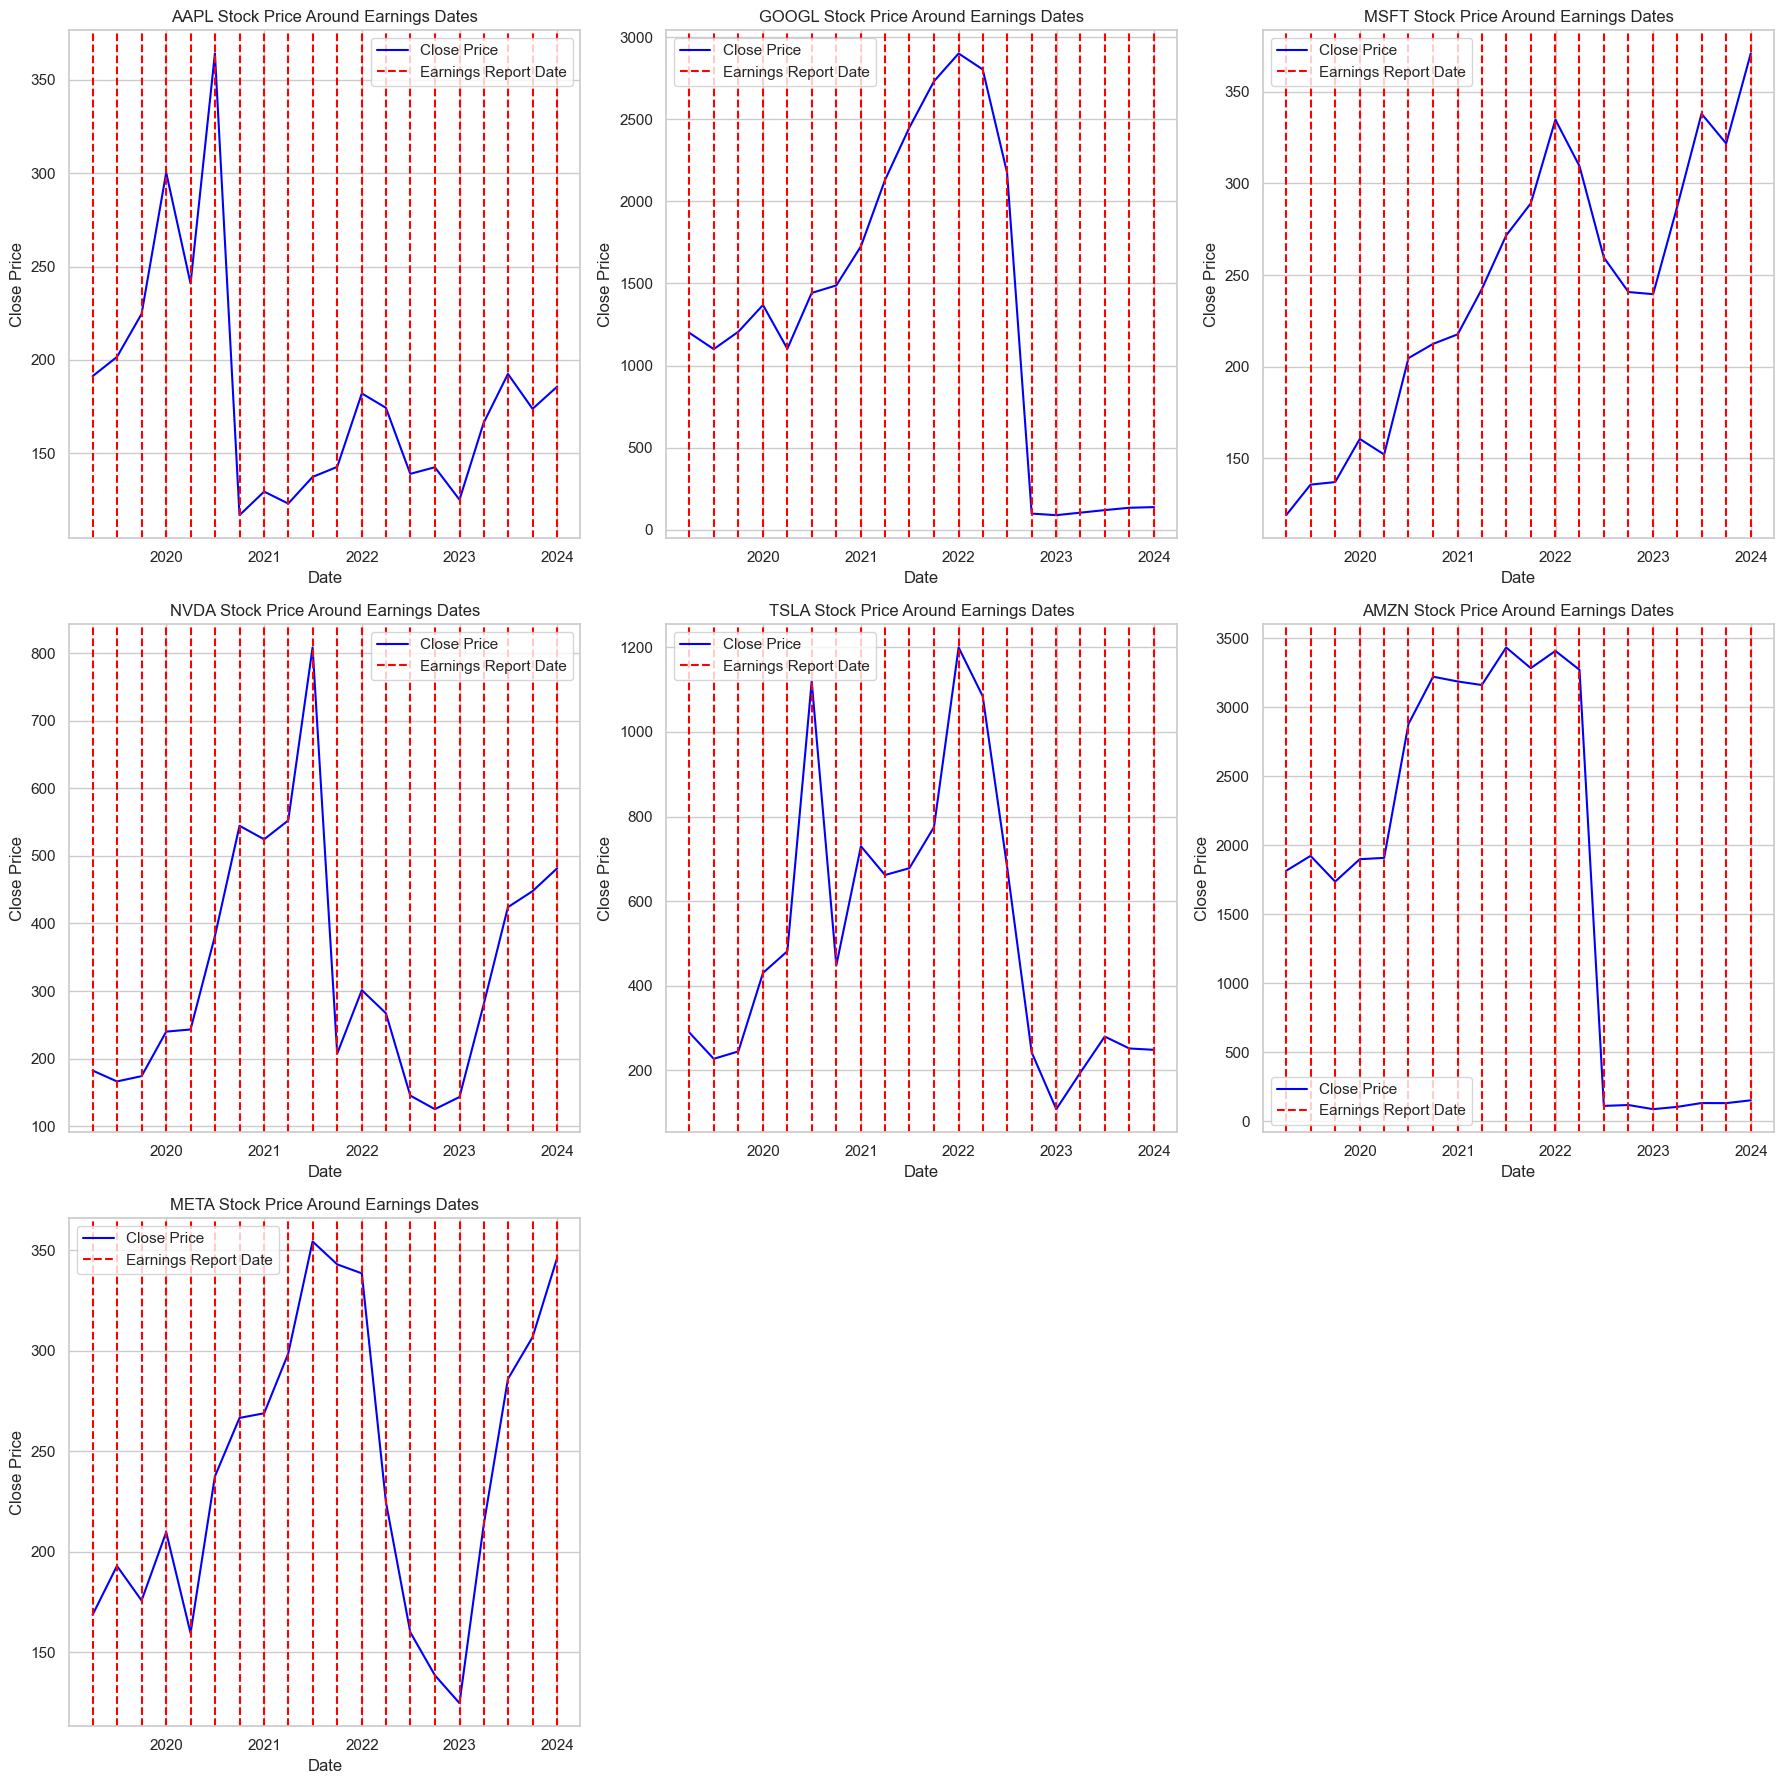

In [42]:
# Define the stocks to plot
stocks = financial_data['stock'].unique()

# Create a figure for the time series plots of stock prices
plt.figure(figsize=(18, 18))

for i, stock in enumerate(stocks, 1):
    plt.subplot(3, 3, i)
    stock_data = financial_data[financial_data['stock'] == stock]
    sns.lineplot(x='Quarter', y='Closing Price After Release', data=stock_data, label='Close Price', color='blue')
    
    # Highlight the earnings report dates with vertical lines
    for date in stock_data['Quarter'].unique():
        plt.axvline(x=date, color='red', linestyle='--', label='Earnings Report Date' if date == stock_data['Quarter'].unique()[0] else "")
    
    plt.title(f'{stock} Stock Price Around Earnings Dates')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()

plt.tight_layout()
plt.show()


## Observations from Stock Price Movements Around Earnings Dates

The plots above illustrate the stock price trends for several major technology companies around their earnings release dates:

- **Impact of Earnings Reports**: Each graph displays significant movements in stock prices around the earnings dates, marked by red dashed lines. These movements can reflect investor reactions to earnings outcomes, either positive or negative.
- **Volatility**: Some stocks show more pronounced volatility around earnings dates, which could be indicative of uncertainty or varied expectations among investors regarding the financial results.
- **Trend Analysis**: For companies like Apple and Tesla, there are clear upward or downward trends leading up to or following earnings releases, suggesting that market sentiment might be strongly influenced by anticipated or actualized financial performance.

These visualizations help stakeholders understand the immediate impacts of earnings reports on stock valuation and can be crucial for strategic decision-making in finance and investments.


## Comparative Financial Metric Analysis Across Companies

This visualization segment constructs scatter plots for each stock, comparing key financial metrics—Revenue, Net Income, and Earnings Per Share (EPS)—against the percentage change in stock price. This analysis helps to identify any potential correlations that might suggest how these metrics influence stock price movements post-earnings announcements.


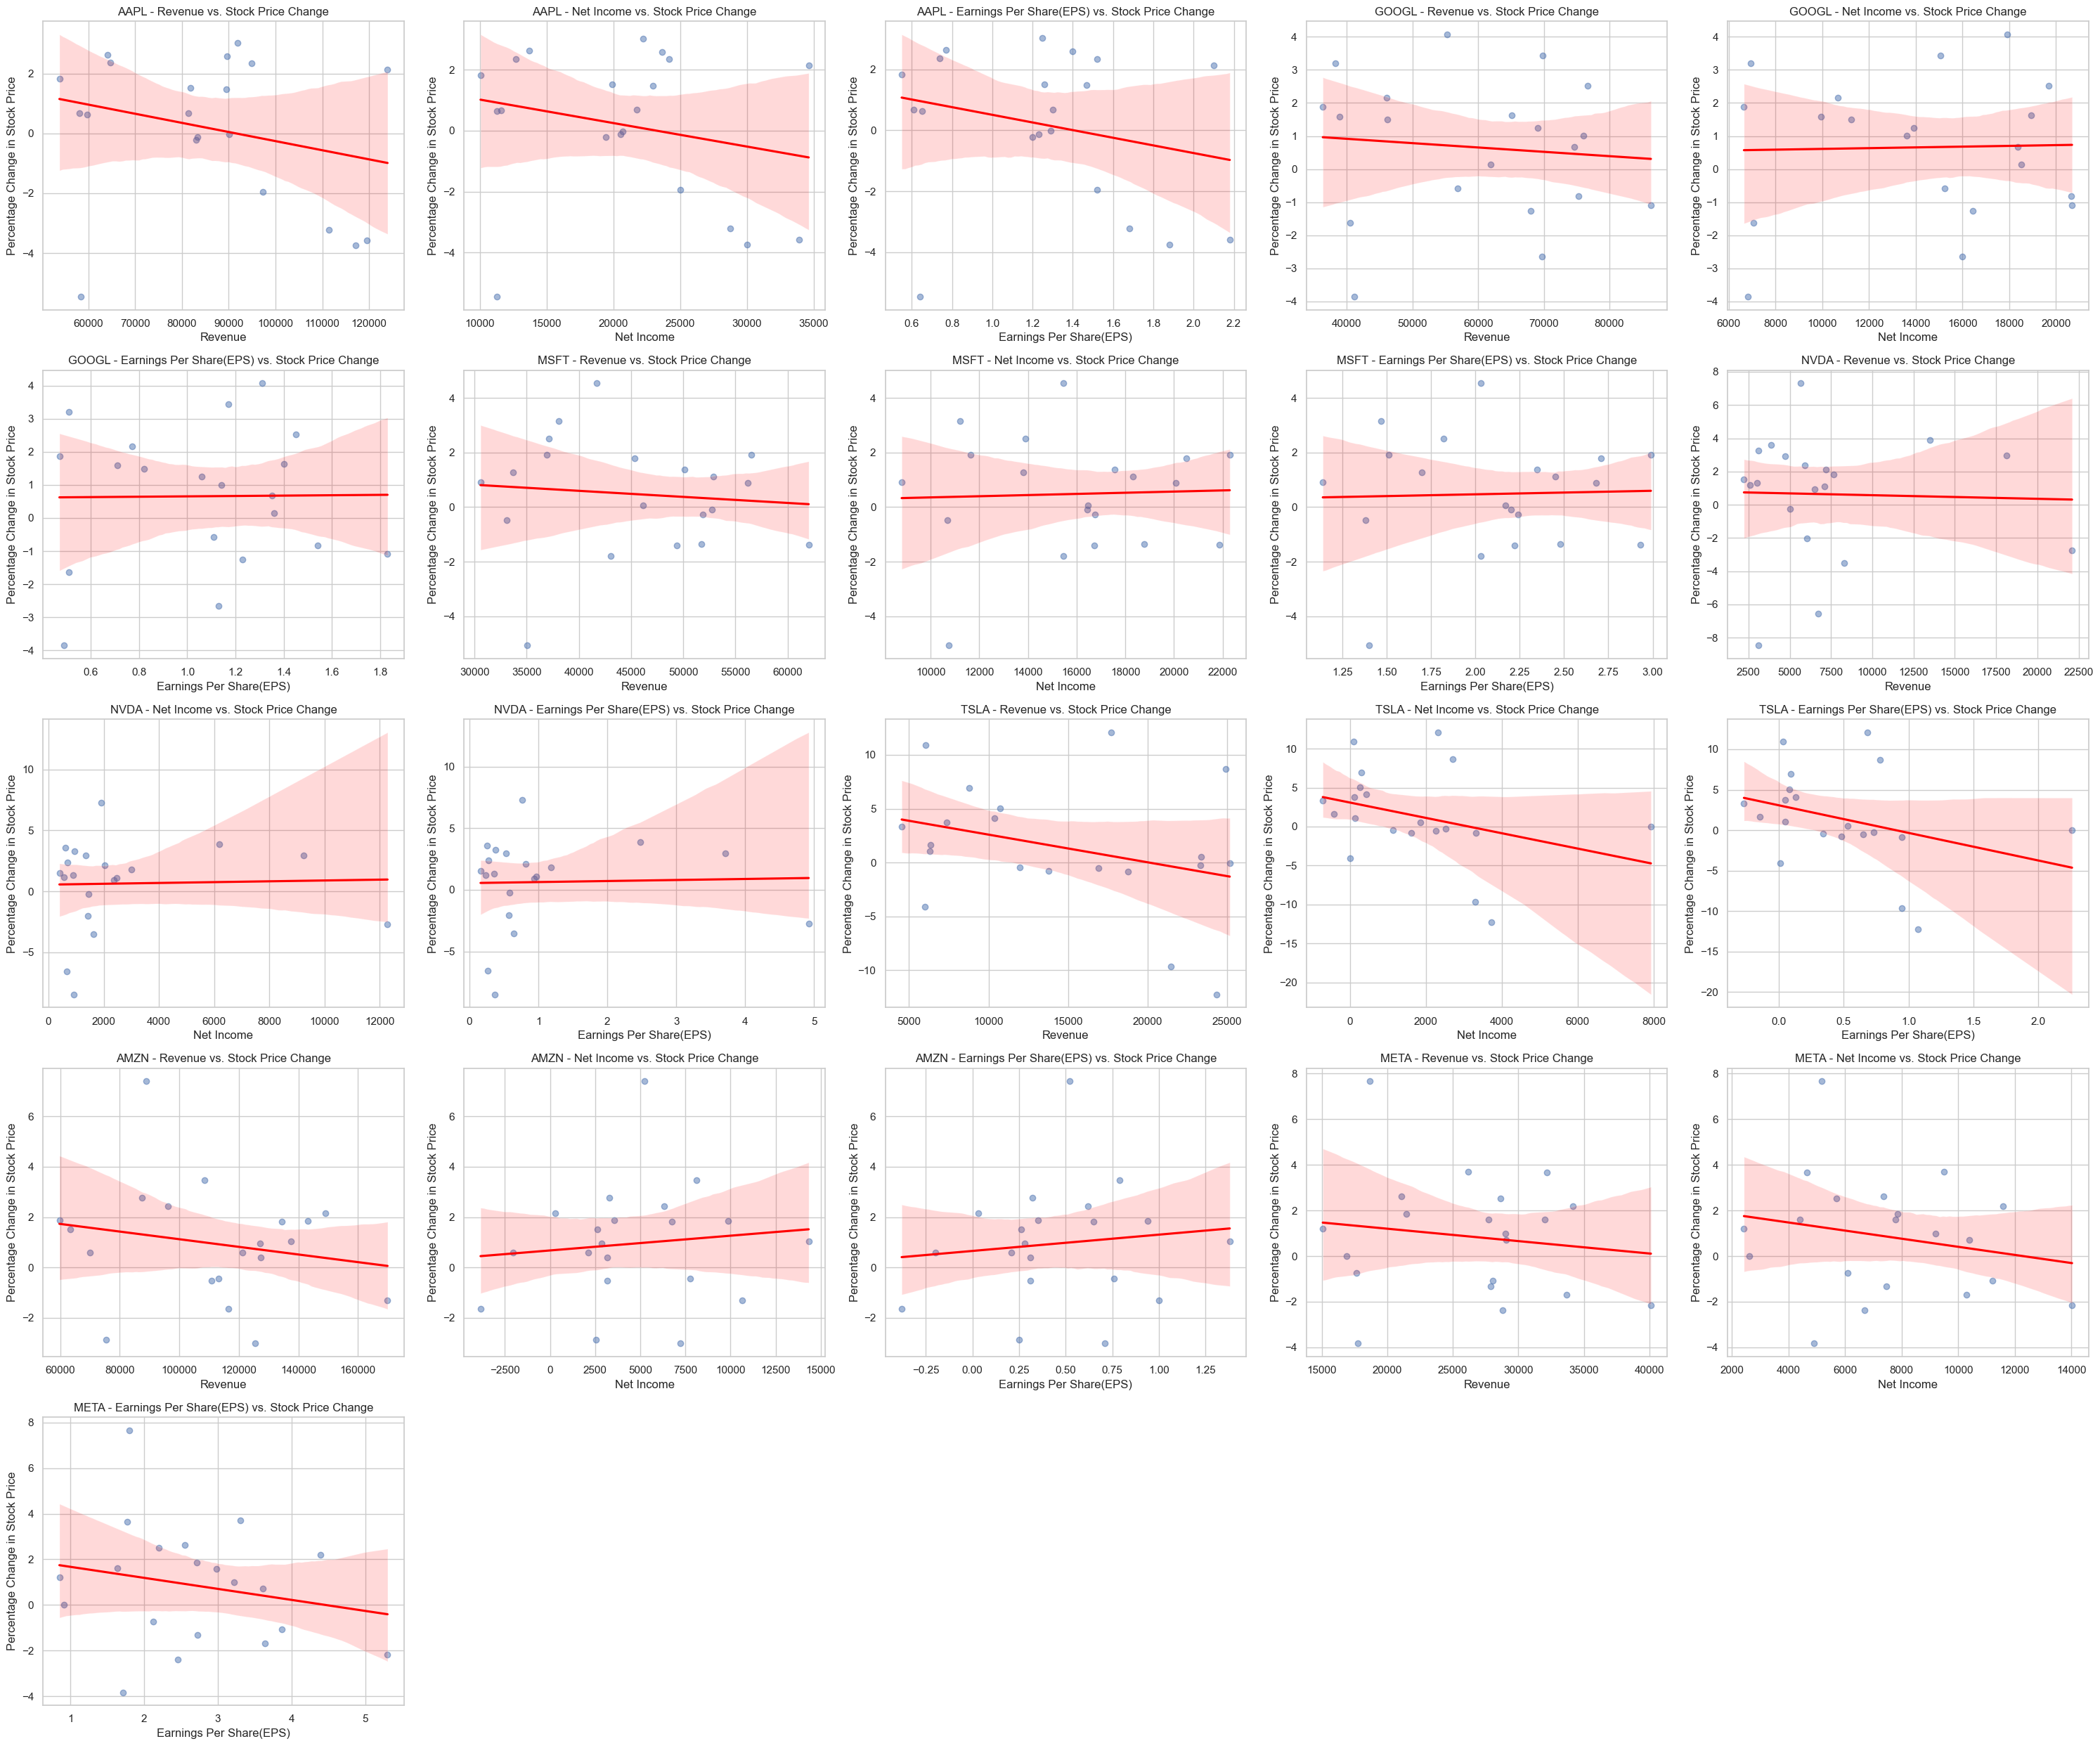

In [64]:
# Determine the required grid size based on the number of stocks and metrics
num_stocks = len(stocks)
metrics = ['Revenue', 'Net Income', 'Earnings Per Share(EPS)']
num_metrics = len(metrics)
total_plots = num_stocks * num_metrics

# Find dimensions for the subplot grid that are as square as possible while fitting all plots
rows = int(np.ceil(np.sqrt(total_plots)))
cols = int(np.ceil(total_plots / rows))

# Create a figure for the scatter plots of key financial metrics
plt.figure(figsize=(cols * 6, rows * 5))  # Adjust figure size based on number of columns and rows

for i, stock in enumerate(stocks, 1):
    stock_data = financial_data[financial_data['stock'] == stock]
    for j, metric in enumerate(metrics, 1):
        plt.subplot(rows, cols, ((i - 1) * len(metrics) + j))
        sns.regplot(x=metric, y='Price Change (%)', data=stock_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
        plt.title(f'{stock} - {metric} vs. Stock Price Change')
        plt.xlabel(metric)
        plt.ylabel('Percentage Change in Stock Price')

plt.tight_layout()
plt.show()


## Insights from Financial Metrics vs. Stock Price Change Analysis

The series of scatter plots across various major companies highlights several insights:

- **Revenue, Net Income, and EPS Influence**: While there is a general trend that higher values in these metrics might correlate with less negative stock price changes, the strength and direction of these relationships vary significantly among companies.
- **Variability in Impact**: Some companies show a stronger correlation between financial success and stock price changes, evident from the tighter clustering of data points and steeper regression lines.
- **Diverse Market Reactions**: The spread of data points, especially in plots with flatter regression lines, indicates that market reactions to financial reports are not solely dependent on these metrics. Other factors like market expectations, sector-specific trends, and broader economic conditions also play crucial roles.

Overall, these visualizations underscore the complexity of stock market dynamics and highlight the necessity for a nuanced approach when analyzing the impact of financial metrics on stock prices.


## Analyzing Correlations Between Key Financial Metrics and Stock Price Changes

In our ongoing analysis of financial performance impacts on stock prices, we calculate and visualize the correlation coefficients for key financial metrics—Revenue, Net Income, Earnings Per Share (EPS), and Operating Margin—across various major companies. These visualizations aim to identify potential influences these financial metrics have on the stock price changes post-earnings announcements.


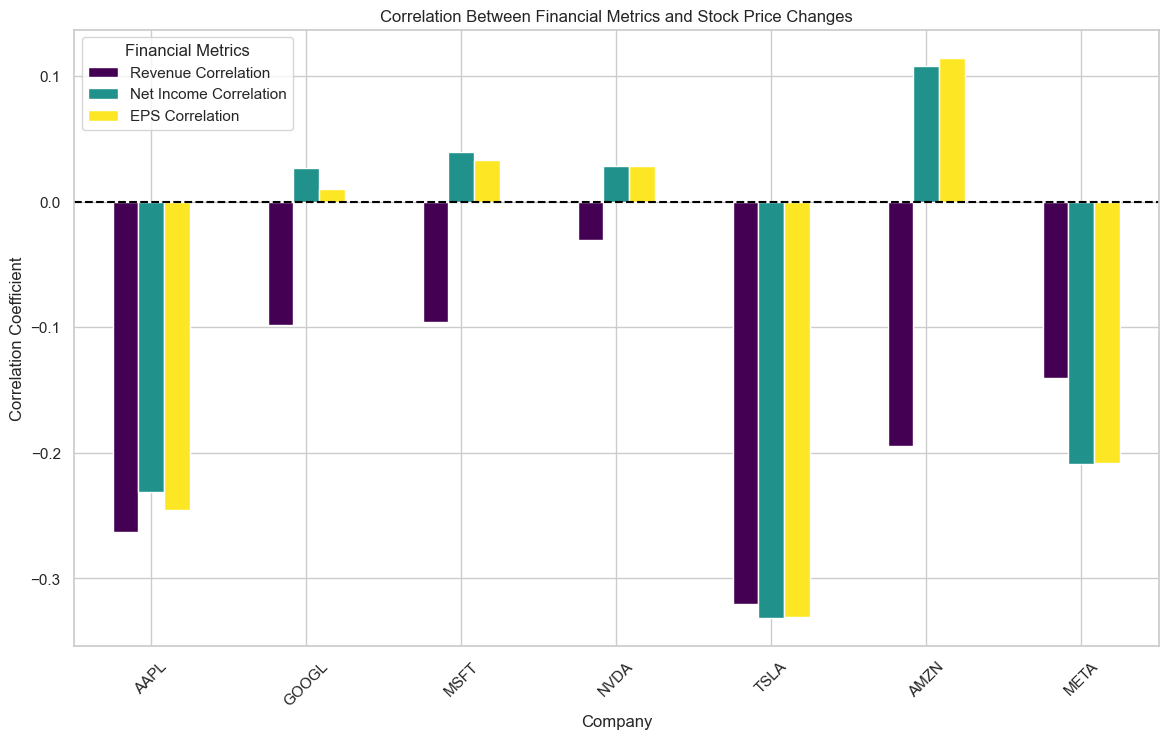

In [65]:
# Calculate the correlation coefficients for each financial metric with the stock price changes across all companies
correlation_results = {}
for stock in stocks:
    stock_data = financial_data[financial_data['stock'] == stock]
    revenue_corr = stock_data['Price Change (%)'].corr(stock_data['Revenue'])
    net_income_corr = stock_data['Price Change (%)'].corr(stock_data['Net Income'])
    eps_corr = stock_data['Price Change (%)'].corr(stock_data['Earnings Per Share(EPS)'])
    correlation_results[stock] = [revenue_corr, net_income_corr, eps_corr]

# Convert the correlation results dictionary into a DataFrame
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index')
correlation_df.columns = ['Revenue Correlation', 'Net Income Correlation', 'EPS Correlation']

# Plotting the correlations for each company
ax = correlation_df.plot(kind='bar', figsize=(14, 8), colormap='viridis')
ax.set_title('Correlation Between Financial Metrics and Stock Price Changes')
ax.set_xlabel('Company')
ax.set_ylabel('Correlation Coefficient')
ax.axhline(y=0, color='black', linestyle='--')  # Reference line at 0 correlation
ax.grid(True)
plt.xticks(rotation=45)
plt.legend(title="Financial Metrics")
plt.show()


## Results of Correlation Analysis by Financial Metric and Company

The bar chart displays the correlation coefficients for Revenue, Net Income, and EPS across different companies. This visualization helps to discern how closely changes in these financial metrics are related to movements in stock prices:

- **Negative and Positive Correlations**: The chart reveals a mix of negative and positive correlations, indicating that for some companies, increases in these metrics might lead to stock price increases, while for others, the effect may be inverse or negligible.
- **Variability Across Companies**: Different companies show different levels of correlation, highlighting the unique financial dynamics and investor expectations that characterize each firm.


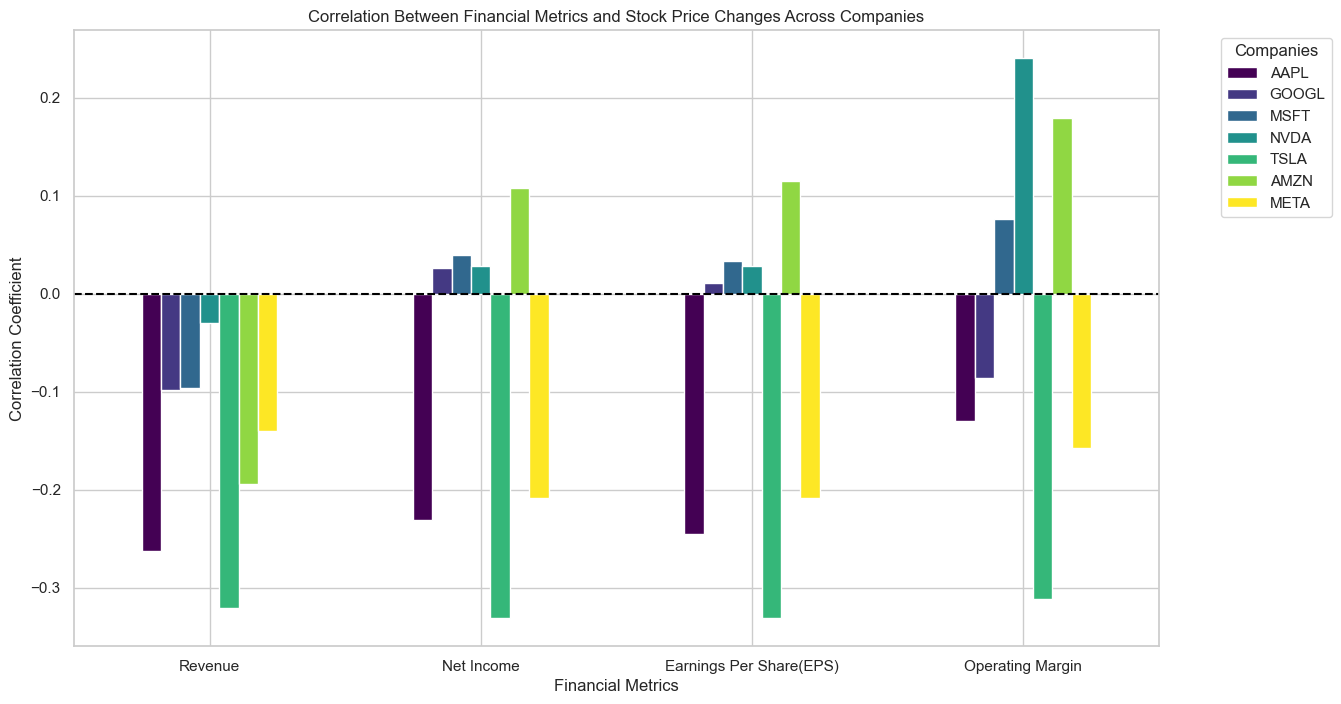

In [66]:
# Calculate Operating Margin for each entry in the financial_data DataFrame
financial_data['Operating Margin'] = financial_data['Operating Income'] / financial_data['Revenue']

# Select relevant financial metrics including the new one and calculate correlations with percentage change for each stock
correlation_results = {}
for stock in stocks:
    stock_data = financial_data[financial_data['stock'] == stock]
    # Filter out entries without necessary data
    relevant_data = stock_data[['Price Change (%)', 'Revenue', 'Net Income', 'Earnings Per Share(EPS)', 'Operating Margin']].dropna()
    correlation_results[stock] = relevant_data.corr()['Price Change (%)'].drop('Price Change (%)')

# Convert the correlation results dictionary into a DataFrame for easier plotting and viewing
correlation_df_extended = pd.DataFrame(correlation_results)

# Plotting the correlations for each company and metric
fig, ax = plt.subplots(figsize=(14, 8))
correlation_df_extended.plot(kind='bar', ax=ax, colormap='viridis')

ax.set_title('Correlation Between Financial Metrics and Stock Price Changes Across Companies')
ax.set_xlabel('Financial Metrics')
ax.set_ylabel('Correlation Coefficient')
ax.axhline(y=0, color='black', linestyle='--')  # Reference line at 0 correlation
ax.grid(True)
plt.xticks(rotation=0)
plt.legend(title="Companies", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Extended Correlation Analysis Including Operating Margin

With the addition of Operating Margin to our analysis, the extended bar chart offers a deeper insight into how operating efficiency impacts stock price changes alongside other financial metrics:

- **Insights Across Metrics**: The visualization suggests that while some metrics like EPS consistently show mild correlations across most companies, Operating Margin provides varying results, underscoring its potential importance in certain contexts.
- **Comparison and Contrast**: By comparing these metrics side by side, we can better understand the complex factors that influence investor reactions to financial disclosures, which can significantly vary across different industry players.

This comprehensive analysis underscores the multifaceted nature of stock market dynamics and the critical role financial metrics play in shaping investor perceptions and stock valuations.


## Decision Tree Regression Model for Stock Price Change Prediction

We have trained a Decision Tree Regression model to predict stock price changes based on financial metrics such as Revenue, Net Income, EBITDA, Earnings Per Share (EPS), Gross Profit, and Operating Income. This model aims to capture the non-linear relationships potentially present among these features and stock price movements.



In [77]:
# Preparing the data for decision tree model
X_tree = financial_data[['Revenue', 'Net Income', 'EBITDA', 'Earnings Per Share(EPS)', 'Gross Profit', 'Operating Income']]
y_tree = financial_data['Price Change (%)']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.3, random_state=42)

# Creating and training the decision tree model
tree_model = DecisionTreeRegressor(max_depth=3)  # Limiting depth to prevent overfitting
tree_model.fit(X_train, y_train)

# Predicting on the test set and calculating the error
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Display the mean squared error as a measure of model performance
mse


12.715853546928237

### Model Training and Evaluation:
- **Data Split**: The dataset was split into training (70%) and testing (30%) sets to ensure a fair evaluation.
- **Model Configuration**: The model was limited to a maximum depth of three to prevent overfitting.
- **Performance**: The Mean Squared Error (MSE) for the test set predictions is 12.7159. This value quantifies the average squared difference between the estimated values and the actual value, providing a measure of the model's accuracy.

The MSE indicates how closely the model's predictions match the actual changes in stock prices, with lower values suggesting better fit.


## OLS Regression Analysis of Stock Price Changes

An Ordinary Least Squares (OLS) regression was conducted to further analyze the relationship between stock price changes and key financial metrics. This model helps to quantify the strength and significance of each financial metric in predicting stock price movements.



In [75]:
# Attempting to fit the regression model 
try:
    X = financial_data[['Revenue', 'Net Income', 'EBITDA', 'Earnings Per Share(EPS)', 'Gross Profit', 'Operating Income']]
    y = financial_data['Price Change (%)']
    X = sm.add_constant(X)  # Add a constant to the model
    model = sm.OLS(y, X).fit()
    regression_summary = model.summary()
    print(regression_summary)
except Exception as e:
    print("Error:", e)


                            OLS Regression Results                            
Dep. Variable:       Price Change (%)   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.6623
Date:                Sun, 12 May 2024   Prob (F-statistic):              0.680
Time:                        23:19:10   Log-Likelihood:                -361.74
No. Observations:                 140   AIC:                             737.5
Df Residuals:                     133   BIC:                             758.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Regression Summary:
- **Model Fit**: The R-squared value of 0.029 suggests that the model explains about 2.9% of the variance in stock price changes, which is relatively low.
- **Statistical Significance**: Most predictors have high p-values, indicating that they are not statistically significant in predicting price changes at conventional levels.
- **Model Diagnostics**:
  - The condition number is high, suggesting potential multicollinearity or other numerical issues that could affect the model's reliability.
  - The Durbin-Watson statistic is approximately 2.048, indicating no significant autocorrelation in the residuals.

These results suggest that while the financial metrics used may have some relationship with stock price changes, they do not strongly predict price movements on their own. This could imply the need for additional variables or different modeling techniques to better capture the dynamics affecting stock prices.


## Results and Implications

#### Key Findings:
- **Predictive Modeling Results**: The Decision Tree model demonstrated an MSE of 12.7159, suggesting moderate predictive power. The OLS regression model indicated limited explanatory power with an R-squared value of 0.029, highlighting the complexity and potential non-linear relationships between financial metrics and stock price changes.
- **Correlation Insights**: The correlation analysis provided nuanced views into how different financial metrics such as Revenue, Net Income, and EPS are related to stock price changes. While some metrics showed slight correlations, the overall impact on stock price prediction was limited.
- **Impact of Earnings Announcements**: Visual analysis of stock price trends around earnings announcements illustrated significant volatility, underscoring the market's sensitivity to quarterly financial reports.

#### Implications:
- **Strategic Financial Analysis**: The findings suggest that investors and analysts should consider a broader array of factors beyond basic financial metrics when evaluating stock potentials.
- **Modeling Improvements**: For future models, incorporating additional data such as market sentiment, economic indicators, and sector-specific news could enhance predictive accuracy.
- **Investment Strategies**: The variability in stock responses to earnings reports highlights the need for diversified investment strategies to mitigate risks associated with volatility.

#### Adherence to Guidelines:
This project adheres to the initial guidelines and proposal by providing a comprehensive analysis through the application of various data science techniques and models. The workflow was meticulously planned and executed to ensure clarity, reproducibility, and insightful outputs, contributing to a deeper understanding of the financial market dynamics.

### Future Directions
- **Incorporating Machine Learning Enhancements**: Exploring advanced machine learning techniques such as ensemble methods or neural networks might provide better predictive capabilities.
- **Real-time Data Analysis**: Implementing a real-time data pipeline could allow for dynamic stock price forecasting, adapting to new financial data as it becomes available.
- **Broader Market Analysis**: Expanding the dataset to include more companies across different sectors could help in understanding industry-specific dynamics.

Overall, this project has laid a solid foundation for understanding the intricate relationships between financial metrics and stock prices, providing a platform for further research and development in financial analytics.


## Conclusion 

Through meticulous analysis using various machine learning models and statistical methods, this project illuminated the complex relationships between financial metrics and stock price movements within the technology sector. Despite the variability in correlations and the limited predictive power of certain financial metrics alone, the findings underscored the nuanced influence of earnings reports on stock prices. Particularly, the decision tree and OLS regression models revealed that while traditional financial indicators such as Revenue, Net Income, and EPS provide some insights, they do not fully capture the market dynamics post-earnings announcements. This study highlights the necessity for investors to consider a broader spectrum of economic, sector-specific, and macroeconomic factors when analyzing stock performance, ultimately guiding more informed investment decisions in the volatile tech industry.

## References

This project utilized various data sources and tools that provided the financial metrics and stock price data necessary for our analyses. Below are the references and acknowledgments for the resources used:

1. **Alpha Vantage API**: Used for retrieving real-time and historical stock data across different technology companies. More information about the API and its capabilities can be found at [Alpha Vantage's Official Website](https://www.alphavantage.co/).
2. **Financial Data**: Comprehensive financial metrics were sourced from reputable financial data platforms, ensuring the accuracy and reliability of the financial information used in the analysis.
3. **Python Libraries**:
   - **Pandas & NumPy**: For data manipulation and numerical calculations.
   - **Matplotlib & Seaborn**: For data visualization and graphical representation of the analysis.
   - **Statsmodels & Scikit-Learn**: For statistical modeling and machine learning operations.
4. **Other Financial Websites**: Additional financial data and insights were sourced from various financial news websites and databases, which provided supplementary information crucial for the context and depth of the financial analysis.

Each of these resources played a pivotal role in the successful execution of this project, enabling a detailed exploration of the impacts of financial metrics on stock prices in the technology sector.
